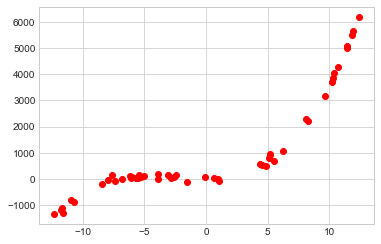

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid') 
import numpy as np 
import random
import copy

# Variables
noiseScale = 100
numberOfSamples = 50

# function was used from Homework1
x = 25*(np.random.rand(numberOfSamples, 1) - 0.5)
#print(x)
# y=5x+15X^2+2x^3 M=3
y = (5 * x) + (15 * x**2) + (2 * x**3) + noiseScale*np.random.randn(numberOfSamples, 1)
z=y.copy()
plt.plot(x,y,'ro')

       3         2
1.955 x + 15.17 x + 10.6 x + 23.31


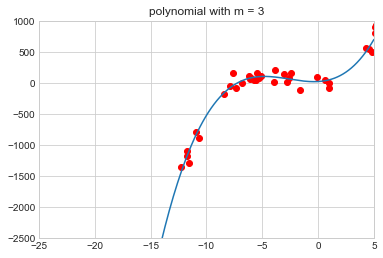

In [2]:
# Convert nD arrays to 1D array using ravel()
type(x)
x = x.ravel()
y = y.ravel()

#Fit the ploynomial
fit = np.poly1d(np.polyfit(x, y, 3))
print(fit)
t = np.linspace(-20, 5, 200)

plt.plot(x, y, 'ro', t, fit(t), '-')

plt.xlim(-25, 5)
plt.ylim(-2500, 1000)
plt.title("polynomial with m = " + str(3))
plt.show()

In [3]:
def Initial_Population(size):
    
    # Creates initial population size of n
    
    # create chormosome list and append random population of size 4
    chromosomes = []
    
    for i in range(size): 
        chromosomes.append([random.randint(-50,50) for i in range(4)])
    #print(chromosomes)
    return chromosomes 

In [4]:
#mutation function
def mutation_operation(individual): 
    
    # gives 9 new mutated chromosomes from each 
    # create mutations list and appening all mutaion here
    mutations = []
    mutations.append(individual)
    
    for _ in range(9): 
        new = copy.deepcopy(individual)
        rand_idx = random.randrange(len(new))
        rand_num = new[rand_idx]
        
        rand_float = random.uniform(0.0,2.0)
        
        new_num = rand_num * rand_float
        new[rand_idx] = new_num
        
        mutations.append(new)
    #print(mutations)
    return mutations

In [5]:
#cross over function
def crossover_operation(parent1, parent2): 
    
    # Implementing One point crossover 
    
    newParent1, newParent2 = [], []
    rand_idx = random.randrange(len(parent1))

    #split parents 1 and 2 from index
    newParent1 = parent1[:rand_idx]+ parent2[rand_idx:]
    newParent2 = parent2[:rand_idx] + parent1[rand_idx:]
    #print(newParent1, newParent2)
    
    return newParent1, newParent2

In [6]:
def cost_function(i, chromosome): 
    
    # Returns coefficients of f(x)
    
    return chromosome[0]*(x[i]**3) + chromosome[1]*(x[i]**2) + chromosome[2]*(x[i])+ chromosome[3]

def fitness_function(chromosome): 
    
    # Measuring chromosomes's fitness by MSE
    #intializ bad to 0 and it will update with MSE
    badness = 0 
    for i in range(len(x)):
        #get cost from cost_function
        pred = cost_function(i, chromosome)
        yval = y[i]
        badness += (pred - yval)**2

    return (chromosome, round(badness))

#fitnesspopulation function takes population ass input and produce bestgenes.
def fitnessPopulation(population): 
    
    #gives overall population's best 10 fitted ones 
    
    bestGenes = []
    for i in range(len(population)): 
        individual = population[i]
        # print(individual)
        scores = fitness_function(individual)
        #print("before",bestGenes)
        bestGenes.append(scores)
        #print(bestGenes)
    bestGenes = sorted(bestGenes, key = lambda x: float(x[1]), reverse = False)[:10]
    return bestGenes 

In [7]:
#main function/genetic function
def Genetic_Algorithm(): 

    num_generations = 50
    bestGenes = []
    
    population = Initial_Population(40)
    #print(population)

    for i in range(num_generations): 
        
        new_population = []
        

        bestGenes = fitnessPopulation(population)
        
        newParents = []
        
        # adding crossover to parents 
        for j in range(0, len(bestGenes)-1,2): 
            
            parent1, parent2 = crossover_operation(bestGenes[j][0], bestGenes[j+1][0])

            newParents.append(parent1)
            newParents.append(parent2)

        #print(newParents)
        # adding mutation to cross-over parents 
        
        for k in range(len(newParents)): 
            
            newGenes = mutation_operation(newParents[k])
            
            # add each child to population 
            for m in newGenes: 
                new_population.append(m)
            
        # replace old popu with new popu 
        population = copy.deepcopy(new_population)

    # print(population)
    return population 

In [8]:
bestFit = Genetic_Algorithm()

In [9]:
new_coeff = fitnessPopulation(bestFit)[0][0]
new_coeff

[2.0459213892412036,
 15.040650566227148,
 -3.448986353380093e-08,
 24.79116452008949]

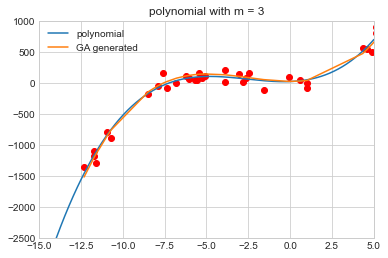

In [10]:
# Comparing the initial graph vs the graph plotted using the coefficients from the Genetic Algorithm

fit = np.poly1d(np.polyfit(x, y, 3))
t = np.linspace(-20, 5, 200)

plt.plot(x, y, 'ro')
plt.plot(t, fit(t), '-', label = 'polynomial')

poly = np.poly1d(new_coeff)
newSorted = np.sort(x) 
plt.plot(newSorted, poly(newSorted), label = 'GA generated') 

plt.xlim(-15, 5)
plt.ylim(-2500, 1000)
plt.legend()
plt.title("polynomial with m = " + str(3))
plt.show()


<b>
    
 - Every time we are getting differnt outputs. sometimes GA is converging to polynomial functions and some times    it not .
 - Also the convergence is depending on Number of generations and and also on initial population count
 - when the number of generations or count of initial population is low, moslty it is diverging
 - There fore we should give good values for initial population and number of generations count as well.
</b>

# Compare  and discussion the difference in performance of the two polynomials obtained with two different  methods. 

In [15]:
y_poly=fit(x)

In [16]:

ypred=[]
for i in x:
    y=new_coeff[0] * i**3 + new_coeff[1]  * i**2 + new_coeff[2]  * i +new_coeff[3]
    ypred.append(y)

In [17]:
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import mean_absolute_error as mae
MSE_GA=mean_squared_error(z,ypred)
MSE_Poly=mean_squared_error(z,y_poly)
print( "Mean Square Error ")
print("MSE for GA:",MSE_GA)
print("MSE for polynomial fit",MSE_Poly)


print(" ")
print("Mean absolute error for GA",mae(z, ypred))
print("Mean abssolute error for polynomial fit :",mae(z, y_poly))


Mean Square Error 
MSE for GA: 8991.74215776096
MSE for polynomial fit 7882.053420085091
 
Mean absolute error for GA 75.92615601347569
Mean abssolute error for polynomial fit : 68.62549340180088


### In both the metrics i.e MAE and MSE:Polynomial degree of 3 with polyfit has less error comapred to Genetic Algorithm. It may vary for higher degree polynomials